<a href="https://colab.research.google.com/github/moomonkey/tf_lab/blob/master/Fashion_mnist_1_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Denna kod använder tensorflow, keras och Fashion-mnist databas

# Dokumentation kommer från Francois Chollets "Deep learning with Python", tensorflow API, docs, och tutorials: https://www.tensorflow.org/tutorials/keras/basic_classification, Margaret Maynard-Reids https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a, och Keras dokumentation, https://keras.io/examples/mnist_cnn/. Visualisering är inkluderad för att verifiera koden.

# Imports

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importera dataset Fashion-mnist

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Se träningsdata

Träningsbilder:  (60000, 28, 28) Träningsetiketter:  (60000,)
Testbilder:  (10000, 28, 28) Testetiketter:  (10000,)
AxesImage(54,36;267.84x217.44) <matplotlib.colorbar.Colorbar object at 0x7f0e87c2d940>


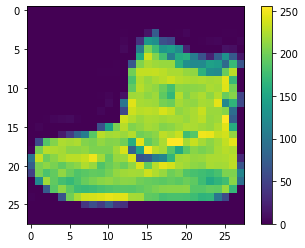

In [64]:
#Se träningsdata
print("Träningsbilder: ", train_img.shape, "Träningsetiketter: ", train_labels.shape) #består av 60000 exempel i 28*28 pixelformat
#Se testdata
print("Testbilder: ", test_img.shape, "Testetiketter: ", test_labels.shape) #består av 10000 exempel i 28*28 format
#Se bild från träningsdata
print(plt.imshow(train_img[0]), plt.colorbar())

# Skapa etiketter för datasetets kategorier

In [0]:
fashion_cat = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Boot']

#Bilder från träningsset med kategorier

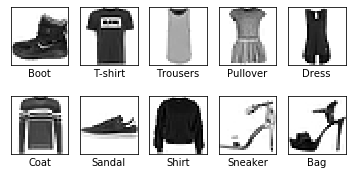

In [66]:
plt.figure(figsize=(6,3)) #utan prediction
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(fashion_cat[i-1])
plt.show()

#Förbered data. Normalize data

In [67]:
# Normalisera data
import pandas as pd
train_img = train_img.reshape(-1,28,28,1)
print(train_img.shape)
test_img = test_img.reshape(-1,28,28,1)
print(test_img.shape)
#Normalisera pixeldimension från 0-255 till 0-1
train_img = train_img.astype('float32') / 255 
test_img = test_img.astype('float32') / 255

# encode etiketter
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape) #se output
print(test_labels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


# Definiera modell. 2 conv lager med pooling. Ingen padding + ingen dropouts

In [68]:
model = tf.keras.Sequential()
#Lager ett med Conv2d med 32 channels och 3X3 filter, max-pooling. Definiera input shape i första lagret
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='valid', activation='relu', input_shape=(28, 28, 1))) #conv2D spatial conv av bilder
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))#storlek på poolingfönster, downsample the feature map
#lager två med pooling
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='valid', activation='relu')) #Conv2d med 64 channels och 3X3 filter
model.add(tf.keras.layers.MaxPooling2D(pool_size=2)) #downsample the feature map
#Flatten
model.add(tf.keras.layers.Flatten()) # från 3D till 1D
model.add(tf.keras.layers.Dense(100, activation='relu')) #Dense är 100 neurons "fully connected" classifier network
model.add(tf.keras.layers.Dense(10, activation= 'softmax'))#probabilty score (10 neurons) ges till kategorierna

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

# Kompilera modellen

In [0]:

model.compile(optimizer='adam',#stochastic gradient decent= adam, fungerade bättre än 'rmsprop' som jag också provade
              loss='categorical_crossentropy', #loss funktion categorical
              metrics=['accuracy'])

# Training model med epoch (iteration)

In [70]:
history = model.fit(train_img, train_labels, epochs=20) # 20 epochs, ingen padding, ingen drop-out

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 57s 942us/sample - loss: 0.4579 - acc: 0.8346
Epoch 2/20
60000/60000 [==============================] - 56s 927us/sample - loss: 0.3055 - acc: 0.8884
Epoch 3/20
60000/60000 [==============================] - 56s 929us/sample - loss: 0.2586 - acc: 0.9058
Epoch 4/20
60000/60000 [==============================] - 55s 915us/sample - loss: 0.2254 - acc: 0.9168
Epoch 5/20
60000/60000 [==============================] - 55s 923us/sample - loss: 0.1996 - acc: 0.9257
Epoch 6/20
60000/60000 [==============================] - 55s 909us/sample - loss: 0.1800 - acc: 0.9328
Epoch 7/20
60000/60000 [==============================] - 55s 915us/sample - loss: 0.1594 - acc: 0.9405
Epoch 8/20
60000/60000 [==============================] - 56s 932us/sample - loss: 0.1433 - acc: 0.9464
Epoch 9/20
60000/60000 [==============================] - 55s 917us/sample - loss: 0.1269 - acc: 0.9526
Epoch 10/20
60000/60000 [================

# Använd test data på modellen för att jämföra med träningsdata

#Plot accuracy och loss

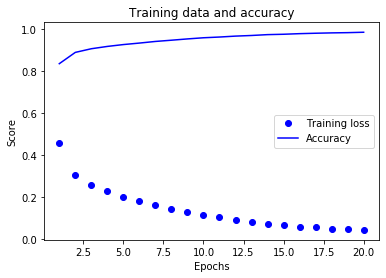

In [71]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, acc_values, 'b', label='Accuracy')
plt.title('Training data and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

In [72]:
history2 = model.fit(test_img, test_labels, epochs=20) 

Train on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 9s 899us/sample - loss: 0.3631 - acc: 0.8893
Epoch 2/20
10000/10000 [==============================] - 9s 910us/sample - loss: 0.1850 - acc: 0.9343
Epoch 3/20
10000/10000 [==============================] - 9s 920us/sample - loss: 0.1326 - acc: 0.9525
Epoch 4/20
10000/10000 [==============================] - 9s 931us/sample - loss: 0.0960 - acc: 0.9667
Epoch 5/20
10000/10000 [==============================] - 9s 895us/sample - loss: 0.0730 - acc: 0.9738
Epoch 6/20
10000/10000 [==============================] - 9s 918us/sample - loss: 0.0503 - acc: 0.9837
Epoch 7/20
10000/10000 [==============================] - 9s 910us/sample - loss: 0.0380 - acc: 0.9885
Epoch 8/20
10000/10000 [==============================] - 9s 919us/sample - loss: 0.0260 - acc: 0.9934
Epoch 9/20
10000/10000 [==============================] - 9s 907us/sample - loss: 0.0225 - acc: 0.9943
Epoch 10/20
10000/10000 [=========================

#Test plot

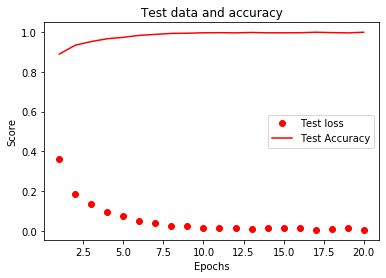

In [73]:
import matplotlib.pyplot as plt

history_dict = history2.history
test_loss_values = history_dict['loss']
test_acc_values = history_dict['acc']
epochs = range(1, len(test_acc_values) + 1)
plt.plot(epochs, test_loss_values, 'ro', label='Test loss')
plt.plot(epochs, test_acc_values, 'r', label='Test Accuracy')
plt.title('Test data and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

#Evaluera och jämför training data med test data

In [74]:
train_loss, train_acc = model.evaluate(train_img, train_labels)
test_loss, test_acc = model.evaluate(test_img, test_labels)
print('\nTrain noggrannhet: ', round(train_acc*100, 2),'%')
print('\nTest noggrannhet: ', round(test_acc*100, 2),'%')
print('\nTrain loss: ', round(train_loss, 2),'%')
print('\nTest loss: ', round(test_loss, 2),'%')


10000/10000 [==============================] - 3s 286us/sample - loss: 0.0012 - acc: 1.0000

Train noggrannhet:  95.32 %

Test noggrannhet:  100.0 %

Train loss:  0.17 %

Test loss:  0.0 %
